In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None
from random import randint
import time 
from datetime import timedelta
import datetime

In [2]:
cwd = os.getcwd()
cwd

'/Users/stevenlu/Desktop/Products/Poshmark Statistics'

In [3]:
df = pd.read_csv("/Users/stevenlu/Desktop/Products/Poshmark Statistics/PoshData.csv")
#df.shape # (96,26)
df.head()
df_analysis = df[['Department','Category','Subcategory','Brand','Buyer State', 'Net Earnings']]



In [4]:
#Cleansing Data
#Capitalizing data
df_analysis['Brand'] = df_analysis['Brand'].str.capitalize()
#Removing $
df_analysis['Net Earnings'] = df_analysis['Net Earnings'].replace({'\$':''}, regex = True)

df_analysis['Net Earnings'] = df_analysis['Net Earnings'].astype(float)


In [5]:
##Addressing Null Values
#null = df_analysis[df_analysis.isna().any(axis=1)]
#print(df.iloc[16])

df_analysis['Brand'][17] = 'American apparel'
df_analysis['Category'][90] = 'Mystery Box'
df_analysis['Category'][4] = 'Sweaters'
df_analysis['Subcategory'][90] = 'Sweatshirts & Hoodies'
df_analysis['Subcategory'][39] = 'Hybrids' 
df_analysis['Subcategory'][25] = 'Messenger Bags' 
df_analysis['Subcategory'][4] = 'Sweatshirts & Hoodies'
df_analysis['Subcategory'][16] = 'Sweatshirts & Hoodies'

In [6]:
#Demographic of Consumers
Buyers = df_analysis.groupby(['Buyer State']).nunique()
Buyers = Buyers['Net Earnings']
Buyers = Buyers.sort_values(ascending=False)
Buyers

Buyer State
CA    16
WA    10
IL     7
OH     5
TX     5
NY     5
FL     4
MI     4
PA     3
NJ     3
MA     3
GA     3
LA     2
HI     2
OR     1
RI     1
KS     1
IN     1
TN     1
VA     1
CT     1
WV     1
Name: Net Earnings, dtype: int64

In [7]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


In [8]:
##Array of random colors
color = []
n = len(Buyers)
for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))

# Where do my consumers live?

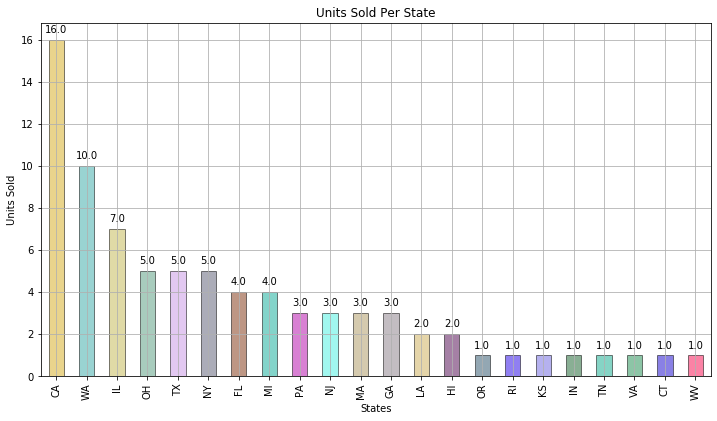

In [9]:
#Graph of Consumer Geography
BuyersDemo = Buyers.plot(figsize = (12,6.5),
                         kind = 'bar',
                         title = 'Units Sold Per State', 
                         grid = True,
                         alpha = 0.5,
                         color=color, 
                         edgecolor='black')
BuyersDemo.set_ylabel('Units Sold')
BuyersDemo.set_xlabel('States')
add_value_labels(BuyersDemo)
##Target Western Seasonality

# Top Selling Category

In [10]:
#Grouping By Top Category
TopCate = df_analysis.groupby(['Category']).count()
TopCate = TopCate['Net Earnings']
TopCate = TopCate.sort_values(ascending=False)
TopCate

Category
Shirts               25
Shoes                15
Jeans                11
Accessories           9
Shorts                7
Pants                 6
Jackets & Coats       6
Sweaters              5
Bags                  5
Underwear & Socks     4
Mystery Box           1
Name: Net Earnings, dtype: int64

,Department,Category,Subcategory,Brand,Buyer State,Net Earnings
6,Men,Shirts,Casual Button Down Shirts,American apparel,MA,14.40
21,Men,Shirts,Tees - Short Sleeve,Pacsun,FL,12.00
23,Men,Shirts,Sweatshirts & Hoodies,Oak + fort,CA,9.05
26,Men,Shirts,Tees - Short Sleeve,American apparel,TX,12.00
27,Men,Shirts,Casual Button Down Shirts,American apparel,NY,30.40


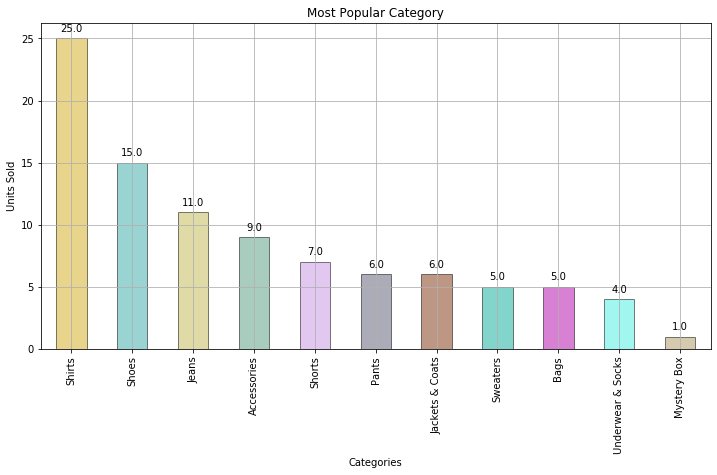

In [11]:
#Graph of Most Sold Category
TopCatePlot = TopCate.plot(figsize = (12,6), 
                            kind = 'bar', 
                            title = 'Most Popular Category',
                            grid = True,
                            alpha = .5,
                            color=color, 
                           edgecolor='black')
TopCatePlot.set_ylabel('Units Sold')
TopCatePlot.set_xlabel('Categories')
add_value_labels(TopCatePlot)
##Wow. I thought shirts took forever to sell, but they're my top sellers.
##Shirt category is top selling but it's inclusive of all tops
df_analysis[df_analysis['Category'] == 'Shirts'].head()

# Most Profitable Category

In [12]:
#Most Profitable Category
MostProfitableCate = df_analysis.groupby(['Category']).sum()
MostProfitableCate = MostProfitableCate.sort_values(by = ['Net Earnings'],ascending=False)

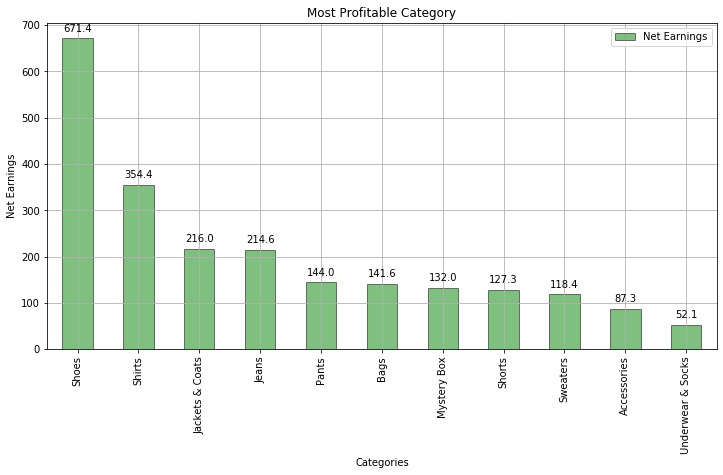

In [13]:
#Graph of Most Sold Category
MostProfitableCatePlot = MostProfitableCate.plot(figsize = (12,6),
                                  kind = 'bar',
                                  title = 'Most Profitable Category',
                                  grid = True,
                                  alpha = .5,
                                  color= 'green', 
                                  edgecolor='black')

MostProfitableCatePlot.set_ylabel('Net Earnings')
MostProfitableCatePlot.set_xlabel('Categories')
add_value_labels(MostProfitableCatePlot)

##Highest Earnings from shoes category, but not very accurate since I sold 2 shoes that were $200+

# Top Customers

In [140]:
#Earnings from individual customers
cust_earnings = df[['Buyer Username','Net Earnings']]
##Removing $ and transforming to float
cust_earnings['Net Earnings'] = cust_earnings['Net Earnings'].replace({'\$':''}, regex = True)
cust_earnings['Net Earnings'] = cust_earnings['Net Earnings'].astype(float)
#cust_earnings.head(10)



In [15]:
#Grouping By Customers and the sum of the purchases
cust_earnings = cust_earnings.groupby(['Buyer Username']).sum()

# Customers of Worth $20+

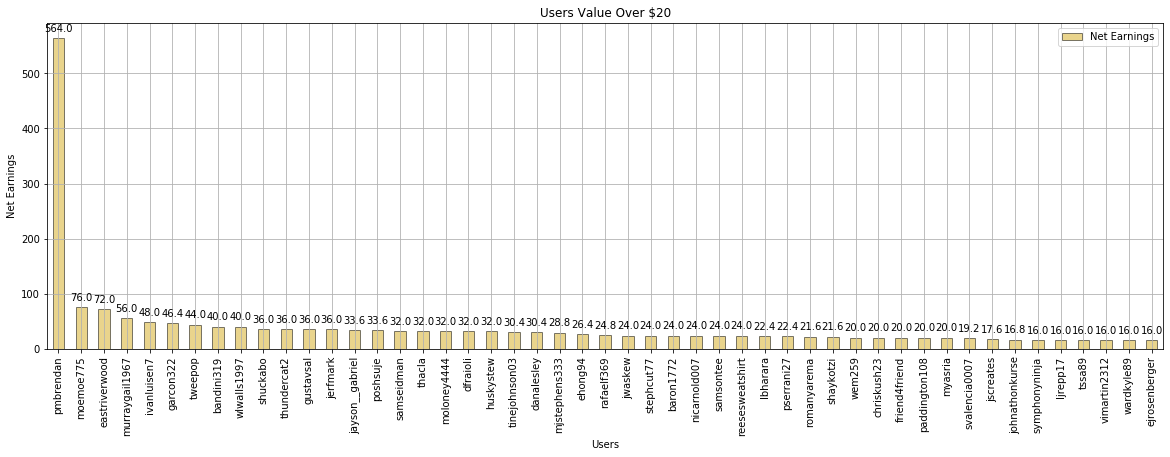

In [16]:
# Customers of $20+ Values
cust_earning20 = cust_earnings.loc[cust_earnings['Net Earnings'] >= 16]
cust_earning20 = cust_earning20.sort_values(by = ('Net Earnings'),ascending = False)
CustEarnings20Plot = cust_earning20.plot(figsize = (20,6), kind = 'bar',
                                  title = 'Users Value Over $20',
                                  grid = True,
                                  alpha = .5,
                                  color= color, 
                                  edgecolor='black')

CustEarnings20Plot.set_ylabel('Net Earnings')
CustEarnings20Plot.set_xlabel('Users')
add_value_labels(CustEarnings20Plot)

##Over 49 Customers who spent $20+

# Customers of Worth $50+

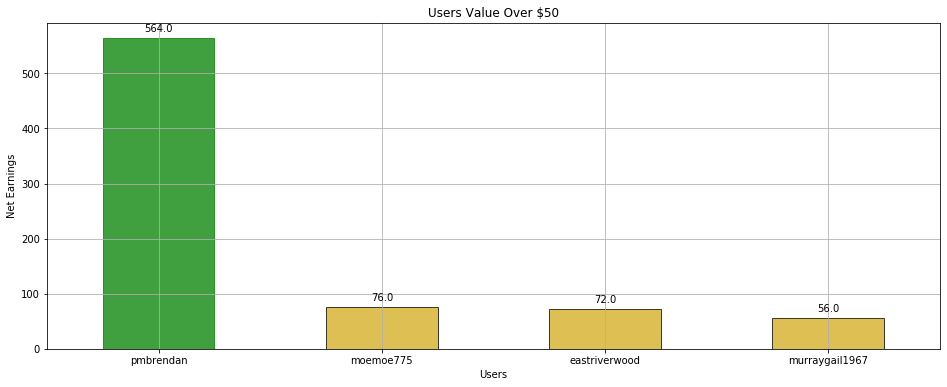

In [17]:
##Customers of Value $50+ 
cust_earnings50 = cust_earnings.loc[cust_earnings['Net Earnings'] >= 50]
cust_earnings50 = cust_earnings50.sort_values(by = ('Net Earnings'),ascending = False)
CustEarnings50Plot = cust_earnings50.plot(figsize = (16,6), kind = 'bar',
                                  title = 'Users Value Over $50',
                                  grid = True,
                                  alpha = .75,
                                  color= color, 
                                  edgecolor='black',
                                  legend = False)

CustEarnings50Plot.set_ylabel('Net Earnings')
CustEarnings50Plot.set_xlabel('Users')
labels = ['pmbrendan','moemoe775','eastriverwood','murraygail1967']
CustEarnings50Plot.set_xticklabels(labels,rotation=0, ha= 'center')
add_value_labels(CustEarnings50Plot)
CustEarnings50Plot.get_children()[0].set_color('green')
##As expected pmbrendan is highest value customer
##Three repeated purchases

In [18]:
TopCustomer = cust_earnings50.iloc[0]
TotalGain = MostProfitableCate['Net Earnings'].sum()
TopCustomerPercentage = TopCustomer.values[0]/MostProfitableCate['Net Earnings'].sum()
##Top Customer only makes up 25% of revenue
##Thought it was more
##Total Gain from Ecommerce = $2259 + $60 from previous Posh Acc as of 8/6/2020
print('Highest Valued Customer makes up',round(TopCustomerPercentage, ndigits=4),'% of the E-Commerce.')

Highest Valued Customer makes up 0.2497 % of the E-Commerce.


# Sales Over Time

In [19]:
##Segmenting another subset of the raw data
df.head()
SalesOverTime = df[['Order Date','Net Earnings']]
#SalesOverTime.head(10)

In [20]:
##Changing the date column to datetime
change_datetime = lambda d: datetime.datetime.strptime(d,'%m/%d/%y')
SalesOverTime['Order Date'] = SalesOverTime['Order Date'].apply(change_datetime)

In [21]:
#Setting Time Series as index
SalesOverTime.set_index('Order Date',inplace=True,drop=True)

In [22]:
##Sorting Index
SalesOverTime = SalesOverTime.sort_index()

In [23]:
SalesOverTime['Net Earnings'] = SalesOverTime['Net Earnings'].replace({'\$':''}, regex = True)
SalesOverTime['Net Earnings'] = SalesOverTime['Net Earnings'].astype(float)

### Sales Over Each Day 

Text(0.5, 0, 'Time')

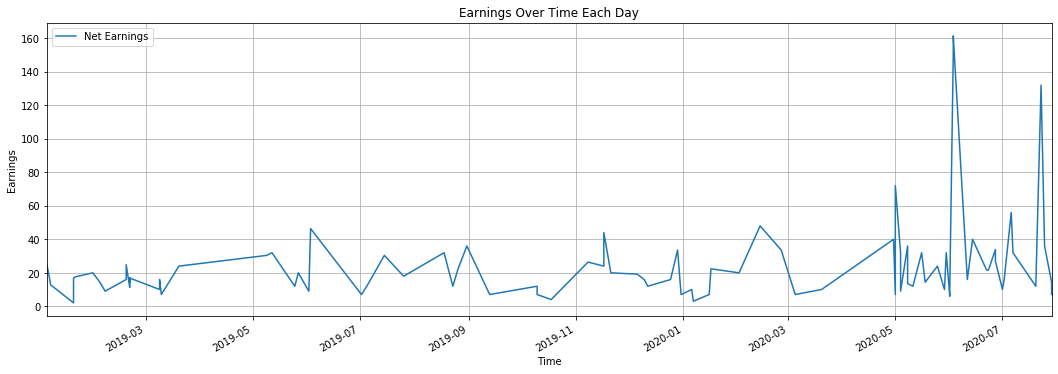

In [24]:
SalesOverTimePlot = SalesOverTime.plot(figsize = (18,6),
                                       kind = 'line', 
                                       title = 'Earnings Over Time Each Day',
                                       grid = True)
SalesOverTimePlot.set_ylabel('Earnings')
SalesOverTimePlot.set_xlabel('Time')

In [25]:
TotalLifeSpan =  SalesOverTime.index[-1]-SalesOverTime.index[0]
TotalLifeSpan
##Spent 572 Days on the app, but didn't use the app consistently/Summer 2019
##Consistently used the app after 2019-11
print('Spent',TotalLifeSpan,"on the app, but wasn't consistent")

Spent 572 days 00:00:00 on the app, but wasn't consistent


In [26]:
# Peak was $161.38
##Highest Item Sold
SalesOverTime.values.max()

161.38

In [27]:
#Grouping By Months
MonthlySales = SalesOverTime.groupby(pd.Grouper(freq='M')).sum()

### Sales Over Each Month

Sales Peaked at 523.2


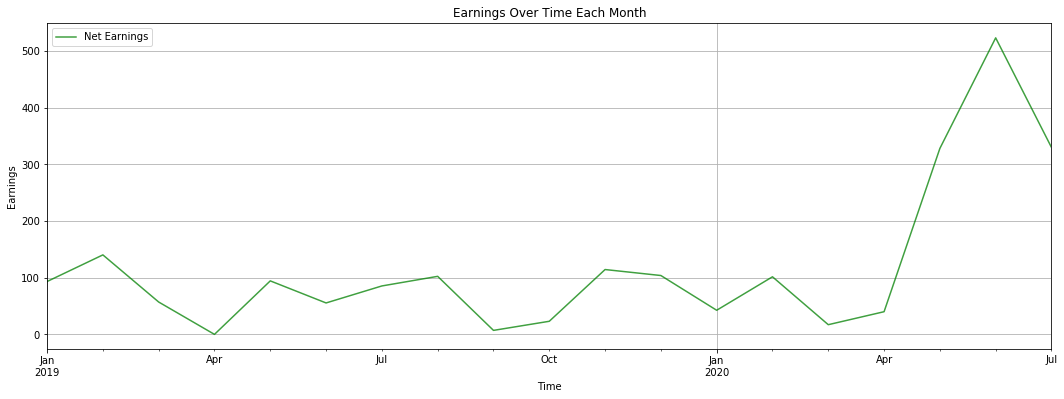

In [28]:
MonthlySalesPlot = MonthlySales.plot(figsize = (18,6),
                                     title = 'Earnings Over Time Each Month',
                                     kind = 'line', 
                                     color = 'green', 
                                     grid = True, 
                                     alpha = 0.75)
MonthlySalesPlot.set_ylabel('Earnings')
MonthlySalesPlot.set_xlabel('Time')
##Sales went up after people got their UI benefits
##Hit Sales Peak in June 2020 at 523.2
print('Sales Peaked at', MonthlySales.values.max(),)

In [29]:
#Grouping Sales By Year
YearlySales = SalesOverTime.groupby(pd.Grouper(freq='Y')).sum()

### Yearly Sales [As of Aug 6, 2020]

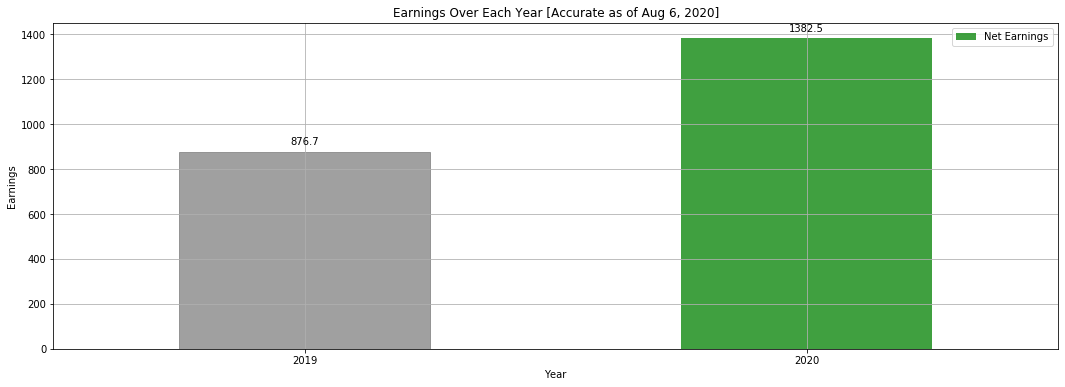

In [30]:
#Display of yearly sales 2019/2020
YearlySalesPlot = YearlySales.plot(figsize = (18,6),
                                     title = 'Earnings Over Each Year [Accurate as of Aug 6, 2020]',
                                     kind = 'bar', 
                                     color = 'green', 
                                     grid = True, 
                                     alpha = 0.75)
YearlySalesPlot.set_ylabel('Earnings')
YearlySalesPlot.set_xlabel('Year')
##Sales went up after people got their UI benefits
##Hit Sales Peak in June 2020 at 523.2
YearlySales.max()
add_value_labels(YearlySalesPlot)

Years = ['2019','2020']
YearlySalesPlot.set_xticklabels(Years,rotation=0, ha= 'center')
YearlySalesPlot.get_children()[0].set_color('grey')

In [31]:
SalesIncrease = 1382.5/876.7
print('Sales Increased by: ',round(SalesIncrease-1, ndigits = 4),'%, As of August 6, 2020.')

Sales Increased by:  0.5769 %, As of August 6, 2020.


# Average Time Till An Item Is Sold in 2020

In [32]:
##Segmenting Dataframe again
TimeTillSales = df[['Listing Date', 'Order Date']]
TimeTillSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
Listing Date    94 non-null object
Order Date      94 non-null object
dtypes: object(2)
memory usage: 1.5+ KB


In [33]:
##Changing variable to time series
change_datetime = lambda d: datetime.datetime.strptime(d,'%m/%d/%y')
TimeTillSales['Order Date'] = TimeTillSales['Order Date'].apply(change_datetime)
TimeTillSales['Listing Date'] = TimeTillSales['Listing Date'].apply(change_datetime)

In [34]:
#TimeTillSales.head(10)

In [35]:
#Creating a new Days Column which is the difference between when it was sold and posted
TimeTillSales['Days'] = TimeTillSales['Order Date'] - TimeTillSales['Listing Date']

In [36]:
#Segmenting only the year of 2020 for more accurate results
TimeTillSales2020 = TimeTillSales[TimeTillSales['Listing Date'].dt.year == 2020]

In [37]:
##Had to change the timedelt to str then to float
TimeTillSales2020['Days'] = TimeTillSales2020['Days'].astype('timedelta64[D]')
AverageSalesTimeIn2020 = TimeTillSales2020['Days'].mean()
AverageSalesTimeIn2020 = str(AverageSalesTimeIn2020).split(' ')[0]
AverageSalesTimeIn2020 = float(AverageSalesTimeIn2020)

In [38]:
print('Date only accurate from 01/01/2020-08/06/2020.')
print('The average days it takes for an item to sell after being posted is',round(AverageSalesTimeIn2020),'days in the year of 2020.')

Date only accurate from 01/01/2020-08/06/2020.
The average days it takes for an item to sell after being posted is 37 days in the year of 2020.


# Average Time An Item Sold in 2019

In [39]:
TimeTillSales2019 = TimeTillSales[TimeTillSales['Listing Date'].dt.year == 2019]

In [40]:
##Had to change the timedelt to str then to float
TimeTillSales2019['Days'] = TimeTillSales2019['Days'].astype('timedelta64[D]')
AverageSalesTimeIn2019 = TimeTillSales2019['Days'].mean()
AverageSalesTimeIn2019 = str(AverageSalesTimeIn2019).split(' ')[0]
AverageSalesTimeIn2019 = float(AverageSalesTimeIn2019)

In [41]:
print(AverageSalesTimeIn2019)

181.71428571428572


In [42]:
print('Decreased average product turnover from ',int(AverageSalesTimeIn2019),'days to', int(AverageSalesTimeIn2020),'days.')

Decreased average product turnover from  181 days to 37 days.


In [43]:
print('Percentage of decrease',round(181/37, ndigits = 2),'%')

Percentage of decrease 4.89 %


# Most Popular Brands and Its Earnings

In [44]:
PopBrands = df[['Brand', 'Net Earnings']]
PopBrands['Brand'].iloc[24] = 'Killion'
PopBrands['Brand'].iloc[38] = 'Killion'
PopBrands['Brand'].iloc[76] = 'Killion'
PopBrands['Brand'].iloc[13] = 'Adidas'
PopBrands['Brand'].iloc[51] = 'Adidas'

In [45]:
#Removing $
PopBrands['Net Earnings'] = PopBrands['Net Earnings'].replace({'\$':''}, regex = True)
PopBrands['Net Earnings'] = PopBrands['Net Earnings'].astype(float)

In [46]:
PopBrandsCount = PopBrands.groupby(['Brand']).count()
PopBrandsEarnings = PopBrands.groupby(['Brand']).sum()

In [47]:
PopBrandsEarnings = PopBrandsEarnings.sort_values(by='Net Earnings', ascending = False)

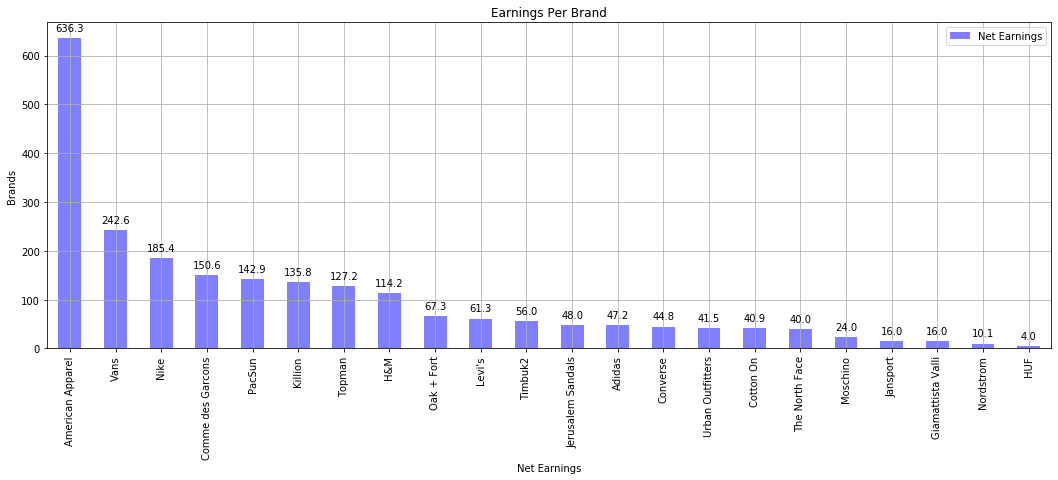

In [48]:
PopBrandsEarningsPlot = PopBrandsEarnings.plot(figsize = (18,6),
                                     title = 'Earnings Per Brand',
                                     kind = 'bar', 
                                     color = 'blue', 
                                     grid = True, 
                                     alpha = 0.5)

PopBrandsEarningsPlot.set_ylabel('Brands')
PopBrandsEarningsPlot.set_xlabel('Net Earnings')
##Sales went up after people got their UI benefits
##Hit Sales Peak in June 2020 at 523.2
YearlySales.max()
add_value_labels(PopBrandsEarningsPlot)
##American Apparel brought in the most $$

In [49]:
print('American Apparel sales is ',round(float(PopBrandsEarnings.iloc[0].values/PopBrandsEarnings.iloc[1].values), ndigits = 3)*100,'% more than Vans.')

American Apparel sales is  262.3 % more than Vans.


# Mens vs Women products

In [50]:
MostPopDept = df[['Department', 'Color']]
ManWomen = MostPopDept.groupby(['Department']).count()

In [51]:
Man = ManWomen.iloc[0].values/MostPopDept['Department'].count()
Women = 1-Man
print('Men clothes accounts for ',round(float(Man), ndigits = 4),'of sales, while women clothing accounts for ',round(float(Women), ndigits = 4),'of sales.')

Men clothes accounts for  0.9043 of sales, while women clothing accounts for  0.0957 of sales.


# People who offered vs purchasing 

In [52]:
Offered = df[['Offer Order','Net Earnings']]

In [71]:
OfferedRatio

,Net Earnings,Ratio
Offer Order,,
N,22,0.234043
Y,72,0.765957


In [53]:
OfferedRatio = Offered.groupby(['Offer Order']).count()

In [54]:
OfferedRatio['Ratio'] = OfferedRatio['Net Earnings']/sum(OfferedRatio['Net Earnings'])

In [55]:
print('23% Of people purchase products out right, while the other 76% of people offer.')
OfferedRatio

23% Of people purchase products out right, while the other 76% of people offer.


,Net Earnings,Ratio
Offer Order,,
N,22,0.234043
Y,72,0.765957


# Average and Median Price Per Sale

In [56]:
PricePerUnit = df[['Order Price','Net Earnings']]

In [57]:
PricePerUnit['Net Earnings'] = PricePerUnit['Net Earnings'].replace({'\$':''}, regex = True)
PricePerUnit['Net Earnings'] = PricePerUnit['Net Earnings'].astype(float)

In [58]:
PricePerUnit['Order Price'] = PricePerUnit['Order Price'].replace({'\$':''}, regex = True)
PricePerUnit['Order Price'] = PricePerUnit['Order Price'].astype(float)

In [59]:
AvgOrderPrice = PricePerUnit['Order Price'].mean()
print('Average order price per unit is $',round(AvgOrderPrice, ndigits = 4))
AvgNetEarnings = PricePerUnit['Net Earnings'].mean()
print('Average net earnings per unit is $',round(AvgNetEarnings, ndigits = 4))

Average order price per unit is $ 30.266
Average net earnings per unit is $ 24.0335


In [60]:
MedianOrderPrice = PricePerUnit['Order Price'].median()
MedianNetEarnings = PricePerUnit['Net Earnings'].median()
print('Median order price per unit is $',round(MedianOrderPrice, ndigits = 4))
print('Median net earnings per unit is $',round(MedianNetEarnings, ndigits = 4))

Median order price per unit is $ 21.11
Median net earnings per unit is $ 16.89


In [61]:
##75th Percentile
print('The 75th percentile of order price is',np.percentile(PricePerUnit['Order Price'],75))
print('The 75th percentile of net earnings is',round(np.percentile(PricePerUnit['Net Earnings'],75), ndigits = 4))

The 75th percentile of order price is 36.9625
The 75th percentile of net earnings is 29.57


### Order Price Distribution Plot 

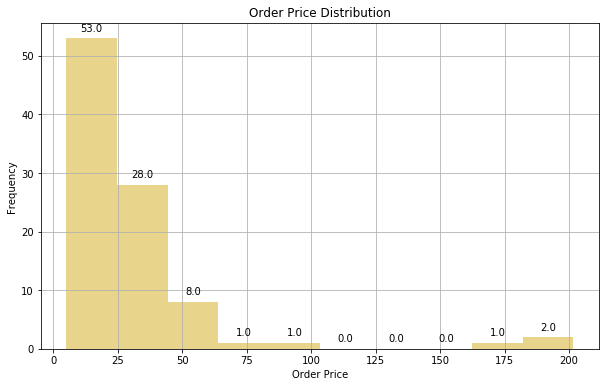

In [62]:
OrderPriceDistPlot = PricePerUnit['Order Price'].plot(figsize = (10,6),
                                     title = 'Order Price Distribution',
                                     kind = 'hist', 
                                     color = color, 
                                     grid = True, 
                                     alpha = 0.5)

OrderPriceDistPlot.set_ylabel('Frequency')
OrderPriceDistPlot.set_xlabel('Order Price')
add_value_labels(OrderPriceDistPlot)

### Net Earnings Distribution Plot

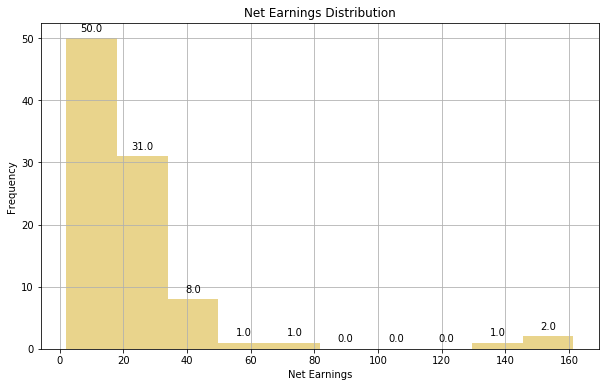

In [63]:
NetEarningDistPlot = PricePerUnit['Net Earnings'].plot(figsize = (10,6),
                                     title = 'Net Earnings Distribution',
                                     kind = 'hist', 
                                     color = color, 
                                     grid = True, 
                                     alpha = 0.5)

NetEarningDistPlot.set_ylabel('Frequency')
NetEarningDistPlot.set_xlabel('Net Earnings')
add_value_labels(NetEarningDistPlot)

### Comparison of Order Price and Net Earnings Distribution

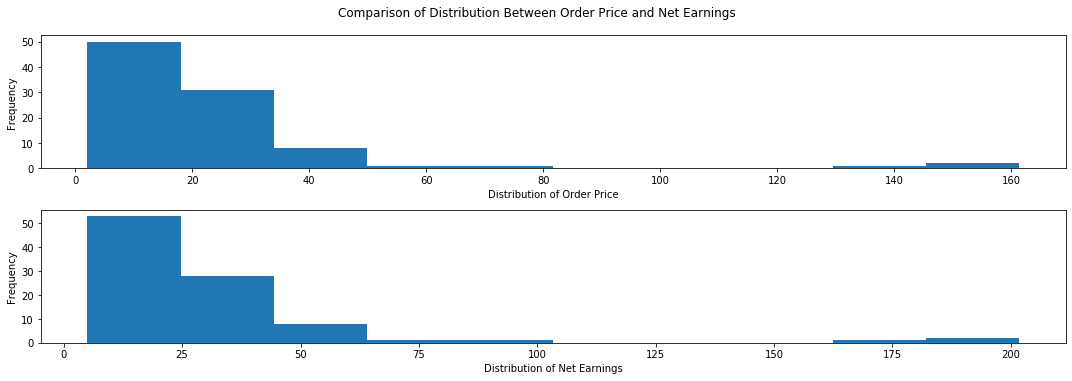

In [64]:
fig, axs = plt.subplots(2, figsize = (15,5))
fig.suptitle('Comparison of Distribution Between Order Price and Net Earnings', y=1.05)
axs[0].hist(PricePerUnit['Net Earnings'])
axs[1].hist(PricePerUnit['Order Price'])
axs[0].set(xlabel='Distribution of Order Price', ylabel='Frequency')
axs[1].set(xlabel='Distribution of Net Earnings', ylabel='Frequency')
plt.tight_layout()

# Growth Comparison of 5 Months Pre-COVID19 and 5 Months After the Beginning of Quarantine

In [65]:
GrowthPercentage = MonthlySales['2020-03-31':'2020-07-31'].sum()/MonthlySales['2019-10-31':'2020-02-29'].sum()
GrowthPercentage = GrowthPercentage[0]
print('After 5 months of quarantine, sales increased by',round(GrowthPercentage*100, ndigits = 4),'%, compared to the previous 5 months.')

After 5 months of quarantine, sales increased by 321.2192 %, compared to the previous 5 months.


# Price Optimization By Brands

In [153]:
PriceOpt = df[df['Category'] == 'Shirts']
PriceOpt = PriceOpt[PriceOpt['Subcategory'] == 'Tees - Short Sleeve']
PriceOpt = PriceOpt[['Brand','Department','Category','Subcategory','Color','Net Earnings']]

In [197]:
BlackTee = PriceOpt[PriceOpt['Color'].str.contains("Black")]
BlackTee = BlackTee[['Brand','Net Earnings']]
#Cleaning Data/Preperation
BlackTee['Brand'].iloc[5] = 'Killion'
BlackTee['Net Earnings'] = BlackTee['Net Earnings'].replace({'\$':''}, regex = True)
BlackTee['Net Earnings'] = BlackTee['Net Earnings'].astype(float)

In [204]:
BlackTee.groupby(['Brand']).mean()

,Net Earnings
Brand,
HUF,4.050000
Killion,6.016667
PacSun,12.000000
adidas,22.400000
